## HW Set 5, Problem 1

Data set #3

Tom Solomon, April 2021 (modified from curve_fit_w_contour, Marty Ligare, August 2020)

In [1]:
import numpy as np
from scipy import optimize
from scipy import stats

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
# Following is an Ipython magic command that puts figures in notebook.
# make pdf-file with matplotlib inline   for jupyter notebook use matplotlib notebook
%matplotlib notebook

# M.L. modification of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
mpl.style.use('classic') 
plt.rc('figure', figsize = (6, 4.5)) # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True) # Adjusts supblot params for new size

#### Define  functions

In [3]:
def f(x,m,b):
    '''Simple linear function with slope m and intercept b'''
    return x*m + b

def chi2(x, y, u, m, b):
    '''Chisquare as a function of data (x, y, and yerr=u), and model 
    parameters slope and intercept (m and b)'''
    return np.sum((y - f(x, m, b))**2/u**2)

### Linear fit to data for $m$ and $b$

#### Data to be fit:

In [4]:
# Or: data = np.loadtxt("file.dat")  
# Format:  [[x1,y1,u1], [x2,y2,u2], ... ]   where u1 is uncertainty in y1
data = np.array([[1, 4.67468, 0.5], [2, 2.82931, 0.6], [3, -0.53042, 1.2], [4, -2.37786, 1.5],\
                [5, -5.57461, 2.4], [6, -7.29526, 3.6], [7, -9.98074, 3.5], [8, -11.9649, 4.5], \
                [9, -14.7745,4.6], [10, -16.711, 5.5]])
x, y, u = data.T

<IPython.core.display.Javascript object>


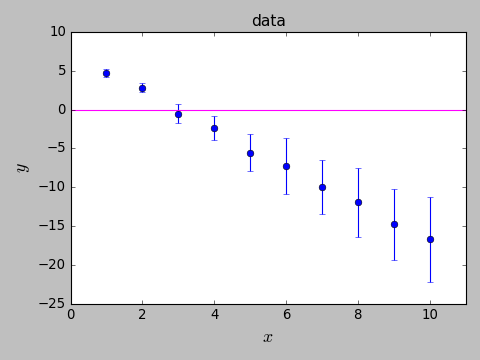

In [5]:
xc = np.linspace(0,11,201) # quasi-continuous set of x's for function plot
plt.figure()
plt.title("data",fontsize=14)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axhline(0,color='magenta')
plt.xlim(0,11) 
plt.errorbar(x,y,yerr=u,fmt='o');

#### In this case, the uncertaintes grow with the data points.  This is the kind of thing that you might see with data that is the log of some measured quantity.

#### Perform fit

In [6]:
popt, pcov = optimize.curve_fit(f, x, y, sigma=u, absolute_sigma=True)

slope = popt[0]
alpha_m = np.sqrt(pcov[0,0])  # Std error in slope
intercept = popt[1]
alpha_b = np.sqrt(pcov[1,1])  # Std error in intercept

print("slope =", slope,"+/-", alpha_m,"\n")
print("intercept =", intercept,"+/-", alpha_b,"\n")

print("covariance matrix =","\n",pcov,"\n")
pcov_data = pcov

print("chi2 =", chi2(x, y, u,*popt))
# print("reduced chi2 = chi2/(len(x)-len(popt)) =", chi2(x, y, u, *popt)/(len(x)-len(popt)))

a = chi2(x,y,u,*popt)

slope = -2.4297297721141917 +/- 0.23898144693063278 

intercept = 7.275960714321809 +/- 0.5831187424870578 

covariance matrix = 
 [[ 0.05711213 -0.11226488]
 [-0.11226488  0.34002747]] 

chi2 = 0.8759879697266483


### So, m = -2.4 $\pm$ 0.2 
### b = 7.3 $\pm$ 0.6

<IPython.core.display.Javascript object>


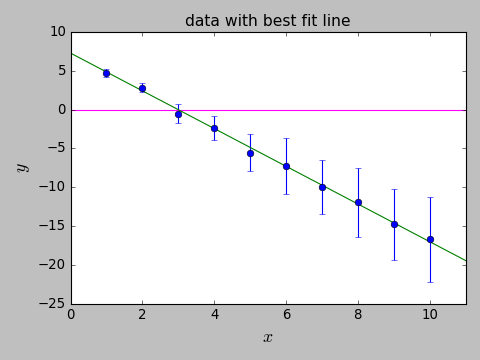

In [7]:
xc = np.linspace(0,11,201) # quasi-continuous set of x's function plot
plt.figure()
plt.title("data with best fit line",fontsize=14)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axhline(0, color='magenta')
plt.xlim(0,11)  # Pad x-range on plot
plt.errorbar(x, y, yerr=u, fmt='o');
plt.plot(xc ,f(xc, slope, intercept));

#### Residuals:

<IPython.core.display.Javascript object>


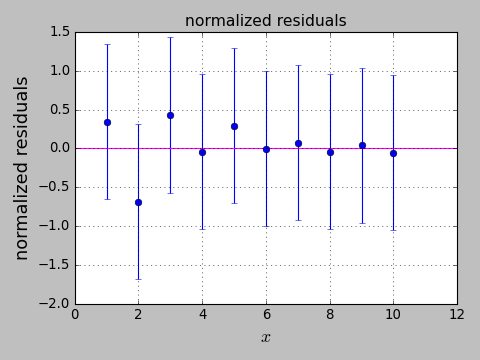

In [8]:
plt.figure()
plt.axhline(0,color='magenta')
plt.title('normalized residuals')
plt.xlabel('$x$')
plt.ylabel('normalized residuals')
plt.grid(True)
plt.errorbar(x,(f(x,slope,intercept)-y)/u,1,fmt='o')
plt.xlim(0,12);

### All of the data points are within 1 uncertainty of the fit, and the last few are _significantly_ within 1 uncertainty.  That is consistent with the small $\chi^2$ here.

#### Make "data" for contour plot
+ Choose ranges of $m$ and $b$ for contour plot
+ Make meshgrid of slope and intercept values
+ Calculate values of $\chi^2$ at grid points

In [9]:
m = np.linspace(-3, -2.0, 201)
b = np.linspace(6.0, 8.0, 201)
M, B = np.meshgrid(m, b, indexing='ij')

Z = np.zeros((len(m),len(b)))

for i in range(len(m)):
    for j in range(len(b)):
        Z[i,j] = chi2(x, y, u, m[i],b[j]) - chi2(x, y, u, *popt)

<IPython.core.display.Javascript object>


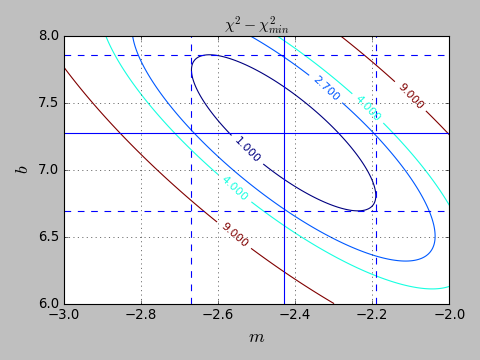

In [13]:
plt.figure()
CS = plt.contour(M, B, Z, levels=[1,2.7,4,9])
plt.xlabel('$m$')
plt.ylabel('$b$')
plt.title("$\chi^2 - \chi^2_{min}$")
plt.grid()
plt.axhline(intercept)
plt.axhline(intercept + alpha_b, linestyle='--')
plt.axhline(intercept - alpha_b, linestyle='--')
plt.axvline(slope)
plt.axvline(slope + alpha_m,linestyle='--')
plt.axvline(slope - alpha_m,linestyle='--')
plt.clabel(CS, inline=1, fontsize=10);

#### We don't need to zoom in here -- already easy to see the "1" contour.

#### So, m goes from about -2.65 to about -2.19, so $\alpha_m \approx 0.2$.  Matches up well with what the fitting program returned.  

#### b goes from about 6.7 to about 7.8 or so, so $\alpha_b \approx 0.5$  Also matches up reasonably well with what the fitting program returned.

#### And $\chi^2$ ended up 0.9.  There are 10 data points, so you would expect $\chi^2$ to be something in the range of 5 to 20.  (Actually, this is too simplistic as we'll discuss in the next class.  Really, there are 8 degrees of freedom, so you really should expect $\chi^2$ to be around 8.) As we'll discuss in the next class, you can determine how unlikely this scenario is if the model is valid.  But this isn't good  -- this $\chi^2$ is a factor of 10 lower than should be expected.

#### So, there are problems here.  This is exactly the kind of fit that people will often say that everything is fine because $\chi^2$ is small.  But it is _too_ small.  So, most likely, the uncertainties in the data points were overestimated.

#### Version information

+ %version_information is an IPython magic extension for showing version information for dependency modules in a notebook; 

+ See `https://github.com/jrjohansson/version_information`

+ `%version_information` is available on Bucknell computers on the linux network.  You can easily install it on
any computer.

In [11]:
%load_ext version_information

In [12]:
%version_information numpy, scipy, matplotlib

Software versions
Python 3.7.8 64bit [GCC 7.5.0]
IPython 7.17.0
OS Linux 3.10.0 1160.36.2.el7.x86_64 x86_64 with centos 7.9.2009 Core
numpy 1.19.1
scipy 1.5.0
matplotlib 3.3.0
Wed Mar 30 09:42:41 2022 EDT